Restarted base (Python 3.9.17)

In [1]:
from openbb_terminal.sdk import openbb
import FinanceDataReader as fdr
import numpy as np
import pandas as pd
import quant

start_date = '2000-01-01'
df = openbb.stocks.load('SPY', start_date = start_date)

df['daily_ret'] = df['Close'].pct_change(1)

def trade(df):
    
    df['trade'] = 0

    df['return_threshold'] = df['daily_ret'].rolling(510).std()
    cond_1 = df['daily_ret'] < - df['return_threshold'] # 당일 최근 2년 moving daily 수익률 기준 1표준편차 이상 하락
    
    cond_2 = abs(df['Low'] - df['Close']) < df['Close'] * 0.001 # 당일 저가가 종가 수준으로 마감

    df['trade'] = np.where(cond_1 & cond_2, 1, 0)

    df['trade'] = df['trade'].shift(1) # 종가매매시 다음날 수익률 적용

    return df

res = trade(df)
res['trade_ret'] = res.daily_ret * res.trade
res['cumret'] = quant.df_cumret(res.trade_ret, is_ret = True)

#1 ) win ratio

quant.win_rate(res['trade_ret'])

Loading Daily data for SPY with starting period 2000-01-03.

102

In [2]:
res

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,daily_ret,trade,return_threshold,trade_ret,cumret
date,,,,,,,,,,,,,
2000-01-03,96.424400,96.424400,93.578823,94.595100,94.595100,8164300,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2000-01-04,93.355195,93.700730,90.824666,90.895805,90.895805,8089800,0.0,0.0,-0.039107,0.0,NaN,-0.00000,0.000000
2000-01-05,91.017752,92.054354,89.269756,91.058403,91.058403,12177900,0.0,0.0,0.001789,0.0,NaN,0.00000,0.000000
2000-01-06,90.814495,92.034027,89.594963,89.594963,89.594963,6227200,0.0,0.0,-0.016071,0.0,NaN,-0.00000,0.000000
2000-01-07,91.261695,94.798340,91.099091,94.798340,94.798340,8066500,0.0,0.0,0.058077,0.0,NaN,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-21,437.549988,440.109985,435.320007,439.339996,439.339996,68719000,0.0,0.0,0.006506,0.0,0.012293,0.00000,0.183743
2023-08-22,441.179993,441.179993,437.570007,438.149994,438.149994,65062900,0.0,0.0,-0.002709,0.0,0.012293,-0.00000,0.183743
2023-08-23,439.250000,443.670013,439.100006,443.029999,443.029999,68441000,0.0,0.0,0.011138,0.0,0.012302,0.00000,0.183743


<Axes: xlabel='date'>

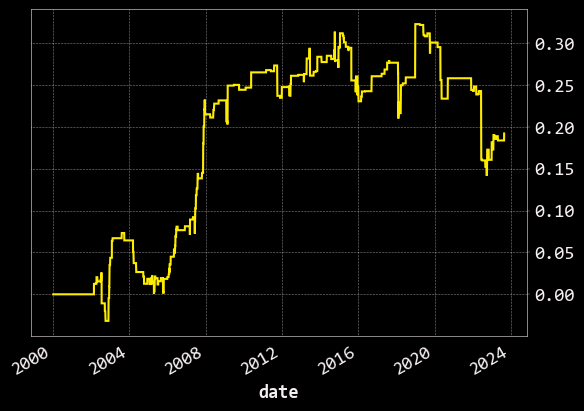

In [3]:
res.cumret.plot()

In [4]:
np.count_nonzero(res['trade_ret'])

182

In [5]:
np.count_nonzero(res['trade'])

182

In [6]:
res

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,daily_ret,trade,return_threshold,trade_ret,cumret
date,,,,,,,,,,,,,
2000-01-03,96.424400,96.424400,93.578823,94.595100,94.595100,8164300,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2000-01-04,93.355195,93.700730,90.824666,90.895805,90.895805,8089800,0.0,0.0,-0.039107,0.0,NaN,-0.00000,0.000000
2000-01-05,91.017752,92.054354,89.269756,91.058403,91.058403,12177900,0.0,0.0,0.001789,0.0,NaN,0.00000,0.000000
2000-01-06,90.814495,92.034027,89.594963,89.594963,89.594963,6227200,0.0,0.0,-0.016071,0.0,NaN,-0.00000,0.000000
2000-01-07,91.261695,94.798340,91.099091,94.798340,94.798340,8066500,0.0,0.0,0.058077,0.0,NaN,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-21,437.549988,440.109985,435.320007,439.339996,439.339996,68719000,0.0,0.0,0.006506,0.0,0.012293,0.00000,0.183743
2023-08-22,441.179993,441.179993,437.570007,438.149994,438.149994,65062900,0.0,0.0,-0.002709,0.0,0.012293,-0.00000,0.183743
2023-08-23,439.250000,443.670013,439.100006,443.029999,443.029999,68441000,0.0,0.0,0.011138,0.0,0.012302,0.00000,0.183743


In [7]:
quant.sharpe_ratio(res.trade_ret, is_ret = True)

AttributeError: module 'quant' has no attribute 'sharpe_ratio'

In [8]:
quant.sharpe(res.trade_ret, is_ret = True)

0.06579299264927475

In [9]:
quant.sharpe(res.daily_ret, is_ret = True)

0.14451755593710358

In [10]:
openbb.economy.indices

In [11]:
openbb.economy.indices()

,,Price,Chg,%Chg
0,DJIA,34346.90,247.48,0.73
1,Nasdaq Composite,13590.65,126.67,0.94
2,S&P 500,4405.71,29.40,0.67
3,DJ Total Stock Market,43919.77,281.38,0.64
4,Russell 2000,1853.63,7.35,0.40
5,NYSE Composite,15766.91,83.90,0.54
6,Barron's 400,978.07,3.13,0.32
7,CBOE Volatility,15.68,-1.52,-8.84
8,DJIA Futures,34426,49,0.14
9,S&P 500 Futures,4416.75,2.50,0.06


In [12]:
openbb.economy

EconomyRoot(

Attributes:
    available_indices: Get available indices
    balance: General government deficit is defined as the balance of income and expenditure of government,
    balance_chart: General government balance is defined as the balance of income and expenditure of government,
    bigmac: Display Big Mac Index for given countries
    bigmac_chart: Display Big Mac Index for given countries
    ccpi: Inflation measured by consumer price index (CPI) is defined as the change in the prices
    ccpi_chart: Inflation measured by consumer price index (CPI) is defined as the change in the prices
    country_codes: Get available country codes for Bigmac index
    cpi: Obtain CPI data from FRED. [Source: FRED]
    cpi_chart: Inflation measured by consumer price index (CPI) is defined as the change in
    currencies: Scrape data for global currencies
    debt: General government debt-to-GDP ratio measures the gross debt of the general
    debt_chart: General government debt-to-GDP rat

In [13]:
openbb.economy.available_indices

In [14]:
()openbb.economy.available_indices

SyntaxError: invalid syntax (<ipython-input-14-1500f25d48f5>, line 1)

In [15]:
openbb.economy.available_indices()

{'sp500': {'name': 'S&P 500 Index', 'ticker': '^GSPC'},
 'sp400': {'name': 'S&P 400 Mid Cap Index', 'ticker': '^SP400'},
 'sp600': {'name': 'S&P 600 Small Cap Index', 'ticker': '^SP600'},
 'sp500tr': {'name': 'S&P 500 TR Index', 'ticker': '^SP500TR'},
 'sp_xsp': {'name': 'S&P 500 Mini SPX Options Index', 'ticker': '^XSP'},
 'nyse_ny': {'name': 'NYSE US 100 Index', 'ticker': '^NY'},
 'dow_djus': {'name': 'Dow Jones US Index', 'ticker': '^DJUS'},
 'nyse': {'name': 'NYSE Composite Index', 'ticker': '^NYA'},
 'amex': {'name': 'NYSE-AMEX Composite Index', 'ticker': '^XAX'},
 'nasdaq': {'name': 'Nasdaq Composite Index', 'ticker': '^IXIC'},
 'nasdaq100': {'name': 'NASDAQ 100', 'ticker': '^NDX'},
 'nasdaq100_ew': {'name': 'NASDAQ 100 Equal Weighted Index',
  'ticker': '^NDXE'},
 'nasdaq50': {'name': 'NASDAQ Q50 Index', 'ticker': '^NXTQ'},
 'russell1000': {'name': 'Russell 1000 Index', 'ticker': '^RUI'},
 'russell2000': {'name': 'Russell 2000 Index', 'ticker': '^RUT'},
 'cboe_bxr': {'name': 'CB

In [16]:
openbb.economy

EconomyRoot(

Attributes:
    available_indices: Get available indices
    balance: General government deficit is defined as the balance of income and expenditure of government,
    balance_chart: General government balance is defined as the balance of income and expenditure of government,
    bigmac: Display Big Mac Index for given countries
    bigmac_chart: Display Big Mac Index for given countries
    ccpi: Inflation measured by consumer price index (CPI) is defined as the change in the prices
    ccpi_chart: Inflation measured by consumer price index (CPI) is defined as the change in the prices
    country_codes: Get available country codes for Bigmac index
    cpi: Obtain CPI data from FRED. [Source: FRED]
    cpi_chart: Inflation measured by consumer price index (CPI) is defined as the change in
    currencies: Scrape data for global currencies
    debt: General government debt-to-GDP ratio measures the gross debt of the general
    debt_chart: General government debt-to-GDP rat

In [17]:
openbb.economy.valuation()

,Name,Market Cap,P/E,Fwd P/E,PEG,P/S,P/B,P/C,P/FCF,EPS past 5Y,EPS next 5Y,Sales past 5Y,Change,Volume
0,Basic Materials,1950.89B,13.89,17.13,2.38,1.56,2.03,11.97,18.72,0.1839,0.0584,0.1178,0.0006,3.154800e+08
1,Communication Services,6316.22B,25.28,17.48,1.4,2.88,3.33,14.05,32.93,0.1493,0.1803,0.1651,0.0011,4.276600e+08
2,Consumer Cyclical,7026.87B,21.69,22.40,1.78,1.70,3.79,10.32,38.54,0.1089,0.1220,0.2047,0.0270,1.370000e+09
3,Consumer Defensive,3652.19B,22.53,20.33,2.77,1.27,4.29,22.12,29.04,0.0608,0.0814,0.0603,0.0058,3.526500e+08
4,Energy,3522.48B,7.25,9.25,,0.95,1.55,10.54,9.67,0.4124,-0.0055,0.1457,0.0087,3.949000e+08
5,Financial,8836.52B,13.62,12.22,1.41,2.15,1.66,0.53,13.65,0.1055,0.0967,0.0861,0.0022,5.995800e+08
6,Healthcare,7527.02B,29.91,17.54,3.25,1.96,4.15,11.47,23.58,0.1144,0.0921,0.1453,0.0065,1.100000e+09
7,Industrials,4877.33B,20.42,16.81,1.78,1.79,3.92,15.46,25.08,0.1195,0.1147,0.0670,0.0068,5.033400e+08
8,Real Estate,1385.52B,30.81,27.55,2.81,3.97,2.01,20.70,28.50,0.1359,0.1095,0.1247,0.0015,2.382400e+08
9,Technology,14054.44B,35.04,23.06,2.81,4.80,7.39,17.30,34.82,0.1687,0.1245,0.1523,0.0087,1.250000e+09


In [18]:
openbb.economy.future()

,prevClose,last,change
label,,,
DJIA,34377.0000,34423.0,0.13
VIX,17.1776,17.2,0.13
Nasdaq 100,14979.2500,14978.0,-0.01
Nikkei 225,31860.0000,32105.0,0.77
Euro Stoxx 50,4246.0000,4275.0,0.68
S&P 500,4414.2500,4416.0,0.04
Russell 2000,1857.4000,1857.9,0.03
DAX,15672.0000,15748.0,0.48


In [19]:
openbb.economy.futures()

,,Price,Chg,%Chg
0,Crude Oil,79.93,0.10,0.13
1,Brent Crude,83.95,0.00,0.00
2,Gold,1944.30,4.40,0.23
3,Silver,24.245,0.011,0.05
4,Natural Gas,2.622,0.082,3.23
5,Unleaded Gasoline,2.6039,-0.0411,-1.55
6,Copper,3.7725,0.0105,0.28
7,Corn,493.25,5.25,1.08
8,Wheat,624.00,2.25,0.36
9,Bloomberg Commodity Index,105.85,0.37,0.35


In [20]:
openbb.economy.future('Nikkei 225')

Error: 'Nikkei 225'

[]

In [21]:
openbb.economy.futures('Nikkei 225')

""


In [22]:
openbb.economy.futures('Nikkei225')

""


In [23]:
from openbb_terminal.sdk import openbb
import pandas as pd
import numpy as np
import quant

start_date = "2010-01-01"

usmv = openbb.stocks.load('usmv', start_date = start_date)
sphb = openbb.stocks.load('sphb', start_date = start_date)
vix = openbb.economy.index(["^VIX"], start_date = start_date).rename(columns = {'^VIX' : 'vix'})
spx = openbb.economy.index(["^SPX"], start_date = start_date).rename(columns = {'^SPX' : 'spx'})

usmv = quant.close_only(usmv).rename(columns = {'close': 'usmv'})
sphb = quant.close_only(sphb).rename(columns = {'close': 'sphb'})

## high vol condition

def hold_usmv(df_vix, vix_quantile = 0.8, spike = 10, interval = 20):
    '''logic : 
    1) 변동성 많이 높으면 -> 떨어질만큼 떨어졌으므로 되려 반등 노리고 high beta / 반대로 vix 일정 이하면 low beta 유지
    2) but VIX 꺾이는건 보고 들어가야... 안그러면 더 조질 수 있음 -> vix가 new high 일때는 low beta 유지
    => 아니면 VIX interval high 면 포지션 X?
    즉 양쪽 (vix 특정 수준 이하 / vix 아예 skyrocket) 일때는 low beta / vix 가 높지만 떨어지고 있는 특정 순간만 high beta'''

    # 1. vix is lower than n-th quantile
    cond_1 = df['vix'] < df['vix'].quantile(vix_quantile)

    #3. vix has spiked
    cond_3 = df['vix'] > df['vix'].shift(interval) + spike

    res = np.where(cond_1 | cond_3, 1, 0)

    return res
    
df = pd.concat([usmv, sphb, vix], axis = 1, join = 'inner')

df['hold_usmv'] = hold_usmv(df.vix) 
df['hold_usmv'] = df['hold_usmv'].shift(1) # 종가기준 매매하면 다음날 수익률부터 반영되게끔 하루 shift
df['hold_sphb'] = np.where(df['hold_usmv'] == 1, 0, 1)

df[['usmv_ret', 'sphb_ret']] = df[['usmv', 'sphb']].pct_change(1)
df['usmv_ret'] = df['usmv_ret'] * df['hold_usmv']
df['sphb_ret'] = df['sphb_ret'] * df['hold_sphb']

df['total_ret'] = df['usmv_ret'] + df['sphb_ret']
df['total_cumret'] = quant.df_cumret(df.total_ret, is_ret = True)

#

Loading Daily data for USMV with starting period 2011-10-20.

Loading Daily data for SPHB with starting period 2011-05-05.

yfinance: download(show_errors=False) argument is deprecated and will be removed in future version. Do this instead to suppress error messages: logging.getLogger('yfinance').setLevel(logging.CRITICAL)


Restarted base (Python 3.9.17)

In [1]:
fdr

NameError: name 'fdr' is not defined

In [2]:
fdr.help

NameError: name 'fdr' is not defined

In [3]:
fdr.help()

NameError: name 'fdr' is not defined

In [4]:
from openbb_terminal.sdk import openbb
import FinanceDataReader as fdr
import numpy as np
import pandas as pd
import quant

start_date = '2000-01-01'
df = openbb.stocks.load('QQQ', start_date = start_date)

df['daily_ret'] = df['Close'].pct_change(1)

def trade(df):
    
    df['trade'] = 0

    df['return_threshold'] = df['daily_ret'].rolling(510).std()
    cond_1 = df['daily_ret'] < - df['return_threshold'] # 당일 최근 2년 moving daily 수익률 기준 1표준편차 이상 하락
    
    cond_2 = abs(df['Low'] - df['Close']) < df['Close'] * 0.001 # 당일 저가가 종가 수준으로 마감

    df['trade'] = np.where(cond_1 & cond_2, 1, 0)

    df['trade'] = df['trade'].shift(1) # 종가매매시 다음날 수익률 적용

    return df

res = trade(df)
res['trade_ret'] = res.daily_ret * res.trade
res['cumret'] = quant.df_cumret(res.trade_ret, is_ret = True)

#1 ) win ratio

quant.win_rate(res['trade_ret'])

Loading Daily data for QQQ with starting period 2000-01-03.

0.5512820512820513

In [5]:
from openbb_terminal.sdk import openbb
import pandas as pd
import numpy as np
import quant

start_date = "2010-01-01"

usmv = openbb.stocks.load('usmv', start_date = start_date)
sphb = openbb.stocks.load('sphb', start_date = start_date)
vix = openbb.economy.index(["^VIX"], start_date = start_date).rename(columns = {'^VIX' : 'vix'})
spx = openbb.economy.index(["^SPX"], start_date = start_date).rename(columns = {'^SPX' : 'spx'})

usmv = quant.close_only(usmv).rename(columns = {'close': 'usmv'})
sphb = quant.close_only(sphb).rename(columns = {'close': 'sphb'})

## high vol condition

def hold_usmv(df_vix, vix_quantile = 0.8, spike = 10, interval = 20):
    '''logic : 
    1) 변동성 많이 높으면 -> 떨어질만큼 떨어졌으므로 되려 반등 노리고 high beta / 반대로 vix 일정 이하면 low beta 유지
    2) but VIX 꺾이는건 보고 들어가야... 안그러면 더 조질 수 있음 -> vix가 new high 일때는 low beta 유지
    => 아니면 VIX interval high 면 포지션 X?
    즉 양쪽 (vix 특정 수준 이하 / vix 아예 skyrocket) 일때는 low beta / vix 가 높지만 떨어지고 있는 특정 순간만 high beta'''

    # 1. vix is lower than n-th quantile
    cond_1 = df['vix'] < df['vix'].quantile(vix_quantile)

    #3. vix has spiked
    cond_3 = df['vix'] > df['vix'].shift(interval) + spike

    res = np.where(cond_1 | cond_3, 1, 0)

    return res
    
df = pd.concat([usmv, sphb, vix], axis = 1, join = 'inner')

df['hold_usmv'] = hold_usmv(df.vix) 
df['hold_usmv'] = df['hold_usmv'].shift(1) # 종가기준 매매하면 다음날 수익률부터 반영되게끔 하루 shift
df['hold_sphb'] = np.where(df['hold_usmv'] == 1, 0, 1)

df[['usmv_ret', 'sphb_ret']] = df[['usmv', 'sphb']].pct_change(1)
df['usmv_ret'] = df['usmv_ret'] * df['hold_usmv']
df['sphb_ret'] = df['sphb_ret'] * df['hold_sphb']

df['total_ret'] = df['usmv_ret'] + df['sphb_ret']
df['total_cumret'] = quant.df_cumret(df.total_ret, is_ret = True)

#

Loading Daily data for USMV with starting period 2011-10-20.

Loading Daily data for SPHB with starting period 2011-05-05.

yfinance: download(show_errors=False) argument is deprecated and will be removed in future version. Do this instead to suppress error messages: logging.getLogger('yfinance').setLevel(logging.CRITICAL)


In [6]:
df

,usmv,sphb,vix,hold_usmv,hold_sphb,usmv_ret,sphb_ret,total_ret,total_cumret
2011-10-20,20.226343,15.658392,34.779999,NaN,1,NaN,NaN,NaN,NaN
2011-10-21,20.473585,16.160429,31.320000,0.0,1,0.000000,0.032062,0.032062,0.032062
2011-10-24,20.473585,16.740370,29.260000,0.0,1,0.000000,0.035886,0.035886,0.069099
2011-10-25,20.401804,16.272951,32.220001,0.0,1,-0.000000,-0.027922,-0.027922,0.039248
2011-10-26,20.489534,16.480692,29.860001,0.0,1,0.000000,0.012766,0.012766,0.052515
...,...,...,...,...,...,...,...,...,...
2023-08-21,74.040001,73.300003,17.129999,1.0,0,0.000135,0.000000,0.000135,5.494597
2023-08-22,73.879997,72.790001,16.969999,1.0,0,-0.002161,-0.000000,-0.002161,5.480562
2023-08-23,74.370003,73.949997,15.980000,1.0,0,0.006632,0.000000,0.006632,5.523544
2023-08-24,73.830002,72.629997,17.200001,1.0,0,-0.007261,-0.000000,-0.007261,5.476177


In [7]:
spx

,spx
Date,
2010-01-04,1132.989990
2010-01-05,1136.520020
2010-01-06,1137.140015
2010-01-07,1141.689941
2010-01-08,1144.979980
...,...
2023-08-21,4399.770020
2023-08-22,4387.549805
2023-08-23,4436.009766


In [8]:
df.align(spx)

(            hold_sphb  hold_usmv       sphb  sphb_ret  spx  total_cumret  \
 2010-01-04        NaN        NaN        NaN       NaN  NaN           NaN   
 2010-01-05        NaN        NaN        NaN       NaN  NaN           NaN   
 2010-01-06        NaN        NaN        NaN       NaN  NaN           NaN   
 2010-01-07        NaN        NaN        NaN       NaN  NaN           NaN   
 2010-01-08        NaN        NaN        NaN       NaN  NaN           NaN   
 ...               ...        ...        ...       ...  ...           ...   
 2023-08-21        0.0        1.0  73.300003       0.0  NaN      5.494597   
 2023-08-22        0.0        1.0  72.790001      -0.0  NaN      5.480562   
 2023-08-23        0.0        1.0  73.949997       0.0  NaN      5.523544   
 2023-08-24        0.0        1.0  72.629997      -0.0  NaN      5.476177   
 2023-08-25        0.0        1.0  73.050003       0.0  NaN      5.520035   
 
             total_ret       usmv  usmv_ret        vix  
 2010-01-04      

In [9]:
df.align(spx)[1]

,hold_sphb,hold_usmv,sphb,sphb_ret,spx,total_cumret,total_ret,usmv,usmv_ret,vix
2010-01-04,NaN,NaN,NaN,NaN,1132.989990,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN,1136.520020,NaN,NaN,NaN,NaN,NaN
2010-01-06,NaN,NaN,NaN,NaN,1137.140015,NaN,NaN,NaN,NaN,NaN
2010-01-07,NaN,NaN,NaN,NaN,1141.689941,NaN,NaN,NaN,NaN,NaN
2010-01-08,NaN,NaN,NaN,NaN,1144.979980,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-08-21,NaN,NaN,NaN,NaN,4399.770020,NaN,NaN,NaN,NaN,NaN
2023-08-22,NaN,NaN,NaN,NaN,4387.549805,NaN,NaN,NaN,NaN,NaN
2023-08-23,NaN,NaN,NaN,NaN,4436.009766,NaN,NaN,NaN,NaN,NaN
2023-08-24,NaN,NaN,NaN,NaN,4376.310059,NaN,NaN,NaN,NaN,NaN


In [10]:
df.align(spx)[0]

,hold_sphb,hold_usmv,sphb,sphb_ret,spx,total_cumret,total_ret,usmv,usmv_ret,vix
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-08-21,0.0,1.0,73.300003,0.0,NaN,5.494597,0.000135,74.040001,0.000135,17.129999
2023-08-22,0.0,1.0,72.790001,-0.0,NaN,5.480562,-0.002161,73.879997,-0.002161,16.969999
2023-08-23,0.0,1.0,73.949997,0.0,NaN,5.523544,0.006632,74.370003,0.006632,15.980000
2023-08-24,0.0,1.0,72.629997,-0.0,NaN,5.476177,-0.007261,73.830002,-0.007261,17.200001


In [11]:
df.align(spx)[1]

,hold_sphb,hold_usmv,sphb,sphb_ret,spx,total_cumret,total_ret,usmv,usmv_ret,vix
2010-01-04,NaN,NaN,NaN,NaN,1132.989990,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN,1136.520020,NaN,NaN,NaN,NaN,NaN
2010-01-06,NaN,NaN,NaN,NaN,1137.140015,NaN,NaN,NaN,NaN,NaN
2010-01-07,NaN,NaN,NaN,NaN,1141.689941,NaN,NaN,NaN,NaN,NaN
2010-01-08,NaN,NaN,NaN,NaN,1144.979980,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-08-21,NaN,NaN,NaN,NaN,4399.770020,NaN,NaN,NaN,NaN,NaN
2023-08-22,NaN,NaN,NaN,NaN,4387.549805,NaN,NaN,NaN,NaN,NaN
2023-08-23,NaN,NaN,NaN,NaN,4436.009766,NaN,NaN,NaN,NaN,NaN
2023-08-24,NaN,NaN,NaN,NaN,4376.310059,NaN,NaN,NaN,NaN,NaN


In [12]:
spx.loc[df.index]

,spx
2011-10-20,1215.390015
2011-10-21,1238.250000
2011-10-24,1254.189941
2011-10-25,1229.050049
2011-10-26,1242.000000
...,...
2023-08-21,4399.770020
2023-08-22,4387.549805
2023-08-23,4436.009766
2023-08-24,4376.310059


In [13]:
from openbb_terminal.sdk import openbb
import pandas as pd
import numpy as np
import quant

start_date = "2010-01-01"

usmv = openbb.stocks.load('usmv', start_date = start_date)
sphb = openbb.stocks.load('sphb', start_date = start_date)
vix = openbb.economy.index(["^VIX"], start_date = start_date).rename(columns = {'^VIX' : 'vix'})
spx = openbb.economy.index(["^SPX"], start_date = start_date).rename(columns = {'^SPX' : 'spx'})

usmv = quant.close_only(usmv).rename(columns = {'close': 'usmv'})
sphb = quant.close_only(sphb).rename(columns = {'close': 'sphb'})

## high vol condition

def hold_usmv(df_vix, vix_quantile = 0.8, spike = 10, interval = 20):
    '''logic : 
    1) 변동성 많이 높으면 -> 떨어질만큼 떨어졌으므로 되려 반등 노리고 high beta / 반대로 vix 일정 이하면 low beta 유지
    2) but VIX 꺾이는건 보고 들어가야... 안그러면 더 조질 수 있음 -> vix가 new high 일때는 low beta 유지
    => 아니면 VIX interval high 면 포지션 X?
    즉 양쪽 (vix 특정 수준 이하 / vix 아예 skyrocket) 일때는 low beta / vix 가 높지만 떨어지고 있는 특정 순간만 high beta'''

    # 1. vix is lower than n-th quantile
    cond_1 = df['vix'] < df['vix'].quantile(vix_quantile)

    #3. vix has spiked
    cond_3 = df['vix'] > df['vix'].shift(interval) + spike

    res = np.where(cond_1 | cond_3, 1, 0)

    return res
    
df = pd.concat([usmv, sphb, vix], axis = 1, join = 'inner')

df['hold_usmv'] = hold_usmv(df.vix) 
df['hold_usmv'] = df['hold_usmv'].shift(1) # 종가기준 매매하면 다음날 수익률부터 반영되게끔 하루 shift
df['hold_sphb'] = np.where(df['hold_usmv'] == 1, 0, 1)

df[['usmv_ret', 'sphb_ret']] = df[['usmv', 'sphb']].pct_change(1)
df['usmv_ret'] = df['usmv_ret'] * df['hold_usmv']
df['sphb_ret'] = df['sphb_ret'] * df['hold_sphb']

df['total_ret'] = df['usmv_ret'] + df['sphb_ret']
df['total_cumret'] = quant.df_cumret(df.total_ret, is_ret = True)

# benchmark

spx = quant.cumret(spx.loc[df.index])

Loading Daily data for USMV with starting period 2011-10-20.

Loading Daily data for SPHB with starting period 2011-05-05.

AttributeError: module 'quant' has no attribute 'cumret'

In [14]:
from openbb_terminal.sdk import openbb
import pandas as pd
import numpy as np
import quant

start_date = "2010-01-01"

usmv = openbb.stocks.load('usmv', start_date = start_date)
sphb = openbb.stocks.load('sphb', start_date = start_date)
vix = openbb.economy.index(["^VIX"], start_date = start_date).rename(columns = {'^VIX' : 'vix'})
spx = openbb.economy.index(["^SPX"], start_date = start_date).rename(columns = {'^SPX' : 'spx'})

usmv = quant.close_only(usmv).rename(columns = {'close': 'usmv'})
sphb = quant.close_only(sphb).rename(columns = {'close': 'sphb'})

## high vol condition

def hold_usmv(df_vix, vix_quantile = 0.8, spike = 10, interval = 20):
    '''logic : 
    1) 변동성 많이 높으면 -> 떨어질만큼 떨어졌으므로 되려 반등 노리고 high beta / 반대로 vix 일정 이하면 low beta 유지
    2) but VIX 꺾이는건 보고 들어가야... 안그러면 더 조질 수 있음 -> vix가 new high 일때는 low beta 유지
    => 아니면 VIX interval high 면 포지션 X?
    즉 양쪽 (vix 특정 수준 이하 / vix 아예 skyrocket) 일때는 low beta / vix 가 높지만 떨어지고 있는 특정 순간만 high beta'''

    # 1. vix is lower than n-th quantile
    cond_1 = df['vix'] < df['vix'].quantile(vix_quantile)

    #3. vix has spiked
    cond_3 = df['vix'] > df['vix'].shift(interval) + spike

    res = np.where(cond_1 | cond_3, 1, 0)

    return res
    
df = pd.concat([usmv, sphb, vix], axis = 1, join = 'inner')

df['hold_usmv'] = hold_usmv(df.vix) 
df['hold_usmv'] = df['hold_usmv'].shift(1) # 종가기준 매매하면 다음날 수익률부터 반영되게끔 하루 shift
df['hold_sphb'] = np.where(df['hold_usmv'] == 1, 0, 1)

df[['usmv_ret', 'sphb_ret']] = df[['usmv', 'sphb']].pct_change(1)
df['usmv_ret'] = df['usmv_ret'] * df['hold_usmv']
df['sphb_ret'] = df['sphb_ret'] * df['hold_sphb']

df['total_ret'] = df['usmv_ret'] + df['sphb_ret']
df['total_cumret'] = quant.df_cumret(df.total_ret, is_ret = True)

# benchmark

spx = quant.df_cumret(spx.loc[df.index])

Loading Daily data for USMV with starting period 2011-10-20.

Loading Daily data for SPHB with starting period 2011-05-05.

In [15]:
spx=

SyntaxError: invalid syntax (<ipython-input-15-36d3bd019ad5>, line 1)

In [16]:
spx

,spx
2011-10-21,0.018809
2011-10-24,0.031924
2011-10-25,0.011239
2011-10-26,0.021894
2011-10-27,0.056936
...,...
2023-08-21,2.620048
2023-08-22,2.609993
2023-08-23,2.649865
2023-08-24,2.600745


In [17]:
df

,usmv,sphb,vix,hold_usmv,hold_sphb,usmv_ret,sphb_ret,total_ret,total_cumret
2011-10-20,20.226339,15.658395,34.779999,NaN,1,NaN,NaN,NaN,NaN
2011-10-21,20.473583,16.160435,31.320000,0.0,1,0.000000,0.032062,0.032062,0.032062
2011-10-24,20.473583,16.740368,29.260000,0.0,1,0.000000,0.035886,0.035886,0.069099
2011-10-25,20.401806,16.272957,32.220001,0.0,1,-0.000000,-0.027921,-0.027921,0.039248
2011-10-26,20.489538,16.480700,29.860001,0.0,1,0.000000,0.012766,0.012766,0.052515
...,...,...,...,...,...,...,...,...,...
2023-08-21,74.040001,73.300003,17.129999,1.0,0,0.000135,0.000000,0.000135,5.494594
2023-08-22,73.879997,72.790001,16.969999,1.0,0,-0.002161,-0.000000,-0.002161,5.480559
2023-08-23,74.370003,73.949997,15.980000,1.0,0,0.006632,0.000000,0.006632,5.523541
2023-08-24,73.830002,72.629997,17.200001,1.0,0,-0.007261,-0.000000,-0.007261,5.476173


In [18]:
df.total_cumret.plot(_)

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

<Axes: >

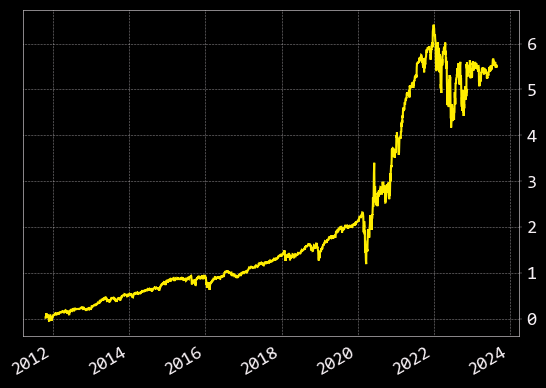

In [19]:
df.total_cumret.plot()

<Axes: >

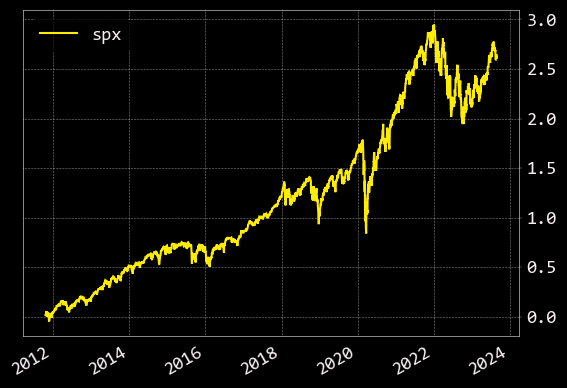

In [20]:
spx.plot()

In [21]:
from openbb_terminal.sdk import openbb
import pandas as pd
import numpy as np
import quant

start_date = "2010-01-01"

usmv = openbb.stocks.load('usmv', start_date = start_date)
sphb = openbb.stocks.load('sphb', start_date = start_date)
vix = openbb.economy.index(["^VIX"], start_date = start_date).rename(columns = {'^VIX' : 'vix'})
spx = openbb.economy.index(["^SPX"], start_date = start_date).rename(columns = {'^SPX' : 'spx'})

usmv = quant.close_only(usmv).rename(columns = {'close': 'usmv'})
sphb = quant.close_only(sphb).rename(columns = {'close': 'sphb'})

## high vol condition

def hold_usmv(df_vix, vix_quantile = 0.8, interval = 252):
    '''logic : 
    1) 변동성 많이 높으면 -> 떨어질만큼 떨어졌으므로 되려 반등 노리고 high beta / 반대로 vix 일정 이하면 low beta 유지
    2) but VIX 꺾이는건 보고 들어가야... 안그러면 더 조질 수 있음 -> vix가 new high 일때는 low beta 유지
    => 아니면 VIX interval high 면 포지션 X?
    즉 양쪽 (vix 특정 수준 이하 / vix 아예 skyrocket) 일때는 low beta / vix 가 높지만 떨어지고 있는 특정 순간만 high beta'''

    # 1. vix is lower than n-th quantile
    cond_1 = df['vix'] < df['vix'].quantile(vix_quantile)

    #2. vix has spiked
    cond_2 = df['vix'] - df['vix'].rolling(interval).mean() > df['vix'].rolling(interval).std()

    res = np.where(cond_1 | cond_2, 1, 0)

    return res
    
df = pd.concat([usmv, sphb, vix], axis = 1, join = 'inner')

df['hold_usmv'] = hold_usmv(df.vix) 
df['hold_usmv'] = df['hold_usmv'].shift(1) # 종가기준 매매하면 다음날 수익률부터 반영되게끔 하루 shift
df['hold_sphb'] = np.where(df['hold_usmv'] == 1, 0, 1)

df[['usmv_ret', 'sphb_ret']] = df[['usmv', 'sphb']].pct_change(1)
df['usmv_ret'] = df['usmv_ret'] * df['hold_usmv']
df['sphb_ret'] = df['sphb_ret'] * df['hold_sphb']

df['total_ret'] = df['usmv_ret'] + df['sphb_ret']
df['total_cumret'] = quant.df_cumret(df.total_ret, is_ret = True)

# benchmark

spx = quant.df_cumret(spx.loc[df.index])

Loading Daily data for USMV with starting period 2011-10-20.

Loading Daily data for SPHB with starting period 2011-05-05.

In [22]:
usm

NameError: name 'usm' is not defined

In [23]:
usmv

,usmv
date,
2011-10-20,20.226345
2011-10-21,20.473585
2011-10-24,20.473585
2011-10-25,20.401806
2011-10-26,20.489540
...,...
2023-08-21,74.040001
2023-08-22,73.879997
2023-08-23,74.370003


In [24]:
sphb

,sphb
date,
2011-05-05,20.835978
2011-05-06,20.913525
2011-05-09,20.913525
2011-05-10,21.352993
2011-05-11,20.913525
...,...
2023-08-21,73.300003
2023-08-22,72.790001
2023-08-23,73.949997


In [25]:
from openbb_terminal.sdk import openbb
import pandas as pd
import numpy as np
import quant

start_date = "2010-01-01"

usmv = openbb.stocks.load('usmv', start_date = start_date)
sphb = openbb.stocks.load('sphb', start_date = start_date)
vix = openbb.economy.index(["^VIX"], start_date = start_date).rename(columns = {'^VIX' : 'vix'})
spx = openbb.economy.index(["^SPX"], start_date = start_date).rename(columns = {'^SPX' : 'spx'})

usmv = quant.close_only(usmv).rename(columns = {'close': 'usmv'})
sphb = quant.close_only(sphb).rename(columns = {'close': 'sphb'})

## high vol condition

def hold_usmv(df_vix, vix_quantile = 0.8, interval = 252):
    '''logic : 
    1) 변동성 많이 높으면 -> 떨어질만큼 떨어졌으므로 되려 반등 노리고 high beta / 반대로 vix 일정 이하면 low beta 유지
    2) but VIX 꺾이는건 보고 들어가야... 안그러면 더 조질 수 있음 -> vix가 new high 일때는 low beta 유지
    => 아니면 VIX interval high 면 포지션 X?
    즉 양쪽 (vix 특정 수준 이하 / vix 아예 skyrocket) 일때는 low beta / vix 가 높지만 떨어지고 있는 특정 순간만 high beta'''

    # 1. vix is lower than n-th quantile
    cond_1 = df['vix'] < df['vix'].quantile(vix_quantile)

    #2. vix has spiked
    cond_2 = df['vix'] - df['vix'].rolling(interval).mean() > df['vix'].rolling(interval).std()

    res = np.where(cond_1 | cond_2, 1, 0)

    return res
    
df = pd.concat([usmv, sphb, vix], axis = 1, join = 'inner')

df['hold_usmv'] = hold_usmv(df.vix) 
df['hold_usmv'] = df['hold_usmv'].shift(1) # 종가기준 매매하면 다음날 수익률부터 반영되게끔 하루 shift
df['hold_sphb'] = np.where(df['hold_usmv'] == 1, 0, 1)

df[['usmv_ret', 'sphb_ret']] = df[['usmv', 'sphb']].pct_change(1)
df['usmv_ret'] = df['usmv_ret'] * df['hold_usmv']
df['sphb_ret'] = df['sphb_ret'] * df['hold_sphb']

df['total_ret'] = df['usmv_ret'] + df['sphb_ret']
df['total_cumret'] = quant.df_cumret(df.total_ret, is_ret = True)

# benchmark

spx = quant.df_cumret(spx.loc[df.index])
usmv = quant.df_cumret(usmv)
sphb = quant.df_cumret(sphb)
strat = df['total_cumret']

res = pd.concat([spx, usmv, sphb, strat], axis = 1)

Loading Daily data for USMV with starting period 2011-10-20.

Loading Daily data for SPHB with starting period 2011-05-05.

In [26]:
res

,spx,usmv,sphb,total_cumret
2011-05-06,NaN,NaN,0.003722,NaN
2011-05-09,NaN,NaN,0.003722,NaN
2011-05-10,NaN,NaN,0.024814,NaN
2011-05-11,NaN,NaN,0.003722,NaN
2011-05-12,NaN,NaN,0.008271,NaN
...,...,...,...,...
2023-08-21,2.620048,2.660573,2.517955,6.601952
2023-08-22,2.609993,2.652662,2.493478,6.585524
2023-08-23,2.649865,2.676889,2.549150,6.635834
2023-08-24,2.600745,2.650191,2.485798,6.580390


In [27]:
df

,usmv,sphb,vix,hold_usmv,hold_sphb,usmv_ret,sphb_ret,total_ret,total_cumret
2011-10-20,20.226341,15.658392,34.779999,NaN,1,NaN,NaN,NaN,NaN
2011-10-21,20.473585,16.160429,31.320000,0.0,1,0.000000,0.032062,0.032062,0.032062
2011-10-24,20.473585,16.740368,29.260000,0.0,1,0.000000,0.035886,0.035886,0.069099
2011-10-25,20.401802,16.272957,32.220001,0.0,1,-0.000000,-0.027921,-0.027921,0.039248
2011-10-26,20.489540,16.480694,29.860001,0.0,1,0.000000,0.012766,0.012766,0.052515
...,...,...,...,...,...,...,...,...,...
2023-08-21,74.040001,73.300003,17.129999,1.0,0,0.000135,0.000000,0.000135,6.601952
2023-08-22,73.879997,72.790001,16.969999,1.0,0,-0.002161,-0.000000,-0.002161,6.585524
2023-08-23,74.370003,73.949997,15.980000,1.0,0,0.006632,0.000000,0.006632,6.635834
2023-08-24,73.830002,72.629997,17.200001,1.0,0,-0.007261,-0.000000,-0.007261,6.580390


In [28]:
from openbb_terminal.sdk import openbb
import pandas as pd
import numpy as np
import quant

start_date = "2010-01-01"

usmv = openbb.stocks.load('usmv', start_date = start_date)
sphb = openbb.stocks.load('sphb', start_date = start_date)
vix = openbb.economy.index(["^VIX"], start_date = start_date).rename(columns = {'^VIX' : 'vix'})
spx = openbb.economy.index(["^SPX"], start_date = start_date).rename(columns = {'^SPX' : 'spx'})

usmv = quant.close_only(usmv).rename(columns = {'close': 'usmv'})
sphb = quant.close_only(sphb).rename(columns = {'close': 'sphb'})

## high vol condition

def hold_usmv(df_vix, vix_quantile = 0.8, interval = 252):
    '''logic : 
    1) 변동성 많이 높으면 -> 떨어질만큼 떨어졌으므로 되려 반등 노리고 high beta / 반대로 vix 일정 이하면 low beta 유지
    2) but VIX 꺾이는건 보고 들어가야... 안그러면 더 조질 수 있음 -> vix가 new high 일때는 low beta 유지
    => 아니면 VIX interval high 면 포지션 X?
    즉 양쪽 (vix 특정 수준 이하 / vix 아예 skyrocket) 일때는 low beta / vix 가 높지만 떨어지고 있는 특정 순간만 high beta'''

    # 1. vix is lower than n-th quantile
    cond_1 = df['vix'] < df['vix'].quantile(vix_quantile)

    #2. vix has spiked
    cond_2 = df['vix'] - df['vix'].rolling(interval).mean() > df['vix'].rolling(interval).std()

    res = np.where(cond_1 | cond_2, 1, 0)

    return res
    
df = pd.concat([usmv, sphb, vix], axis = 1, join = 'inner')

df['hold_usmv'] = hold_usmv(df.vix) 
df['hold_usmv'] = df['hold_usmv'].shift(1) # 종가기준 매매하면 다음날 수익률부터 반영되게끔 하루 shift
df['hold_sphb'] = np.where(df['hold_usmv'] == 1, 0, 1)

df[['usmv_ret', 'sphb_ret']] = df[['usmv', 'sphb']].pct_change(1)
df['usmv_ret'] = df['usmv_ret'] * df['hold_usmv']
df['sphb_ret'] = df['sphb_ret'] * df['hold_sphb']

df['total_ret'] = df['usmv_ret'] + df['sphb_ret']
df['total_cumret'] = quant.df_cumret(df.total_ret, is_ret = True)

# benchmark

spx = quant.df_cumret(spx.loc[df.index])
usmv = quant.df_cumret(usmv)
sphb = quant.df_cumret(sphb)
strat = df['total_cumret']

res = pd.concat([spx, usmv, sphb, strat], axis = 1, join = 'inner')

Loading Daily data for USMV with starting period 2011-10-20.

Loading Daily data for SPHB with starting period 2011-05-05.

In [29]:
res

,spx,usmv,sphb,total_cumret
2011-10-21,0.018809,0.012224,-0.224398,0.032062
2011-10-24,0.031924,0.012224,-0.196564,0.069099
2011-10-25,0.011239,0.008675,-0.218997,0.039248
2011-10-26,0.021894,0.013013,-0.209027,0.052515
2011-10-27,0.056936,0.026419,-0.157098,0.121614
...,...,...,...,...
2023-08-21,2.620048,2.660573,2.517955,6.601968
2023-08-22,2.609993,2.652663,2.493478,6.585540
2023-08-23,2.649865,2.676889,2.549151,6.635851
2023-08-24,2.600745,2.650191,2.485799,6.580407


<Axes: >

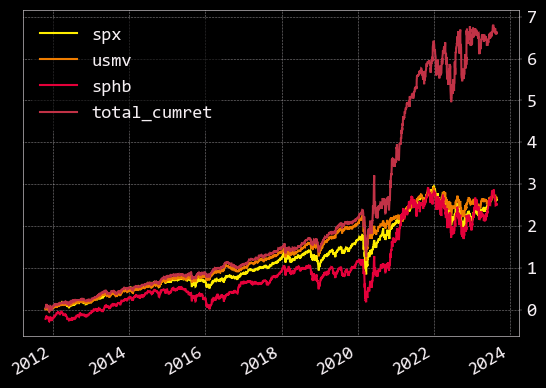

In [30]:
res.plot()

In [31]:
df

,usmv,sphb,vix,hold_usmv,hold_sphb,usmv_ret,sphb_ret,total_ret,total_cumret
2011-10-20,20.226339,15.658388,34.779999,NaN,1,NaN,NaN,NaN,NaN
2011-10-21,20.473589,16.160425,31.320000,0.0,1,0.000000,0.032062,0.032062,0.032062
2011-10-24,20.473589,16.740370,29.260000,0.0,1,0.000000,0.035887,0.035887,0.069099
2011-10-25,20.401808,16.272947,32.220001,0.0,1,-0.000000,-0.027922,-0.027922,0.039248
2011-10-26,20.489536,16.480692,29.860001,0.0,1,0.000000,0.012766,0.012766,0.052515
...,...,...,...,...,...,...,...,...,...
2023-08-21,74.040001,73.300003,17.129999,1.0,0,0.000135,0.000000,0.000135,6.601968
2023-08-22,73.879997,72.790001,16.969999,1.0,0,-0.002161,-0.000000,-0.002161,6.585540
2023-08-23,74.370003,73.949997,15.980000,1.0,0,0.006632,0.000000,0.006632,6.635851
2023-08-24,73.830002,72.629997,17.200001,1.0,0,-0.007261,-0.000000,-0.007261,6.580407


In [32]:
df.to_csv('./a.csv')

In [33]:
res

,spx,usmv,sphb,total_cumret
2011-10-21,0.018809,0.012224,-0.224398,0.032062
2011-10-24,0.031924,0.012224,-0.196564,0.069099
2011-10-25,0.011239,0.008675,-0.218997,0.039248
2011-10-26,0.021894,0.013013,-0.209027,0.052515
2011-10-27,0.056936,0.026419,-0.157098,0.121614
...,...,...,...,...
2023-08-21,2.620048,2.660573,2.517955,6.601968
2023-08-22,2.609993,2.652663,2.493478,6.585540
2023-08-23,2.649865,2.676889,2.549151,6.635851
2023-08-24,2.600745,2.650191,2.485799,6.580407


In [34]:
res.to_csv('./b.csv')

In [35]:
usmv

,usmv
date,
2011-10-21,0.012224
2011-10-24,0.012224
2011-10-25,0.008675
2011-10-26,0.013013
2011-10-27,0.026419
...,...
2023-08-21,2.660573
2023-08-22,2.652663
2023-08-23,2.676889


In [36]:
sphb

,sphb
date,
2011-05-06,0.003722
2011-05-09,0.003722
2011-05-10,0.024814
2011-05-11,0.003722
2011-05-12,0.008271
...,...
2023-08-21,2.517955
2023-08-22,2.493478
2023-08-23,2.549151


In [37]:
from openbb_terminal.sdk import openbb
import pandas as pd
import numpy as np
import quant

start_date = "2010-01-01"

usmv = openbb.stocks.load('usmv', start_date = start_date)
sphb = openbb.stocks.load('sphb', start_date = start_date)
vix = openbb.economy.index(["^VIX"], start_date = start_date).rename(columns = {'^VIX' : 'vix'})
spx = openbb.economy.index(["^SPX"], start_date = start_date).rename(columns = {'^SPX' : 'spx'})

usmv = quant.close_only(usmv).rename(columns = {'close': 'usmv'})
sphb = quant.close_only(sphb).rename(columns = {'close': 'sphb'})

## high vol condition

def hold_usmv(df_vix, vix_quantile = 0.8, interval = 252):
    '''logic : 
    1) 변동성 많이 높으면 -> 떨어질만큼 떨어졌으므로 되려 반등 노리고 high beta / 반대로 vix 일정 이하면 low beta 유지
    2) but VIX 꺾이는건 보고 들어가야... 안그러면 더 조질 수 있음 -> vix가 new high 일때는 low beta 유지
    => 아니면 VIX interval high 면 포지션 X?
    즉 양쪽 (vix 특정 수준 이하 / vix 아예 skyrocket) 일때는 low beta / vix 가 높지만 떨어지고 있는 특정 순간만 high beta'''

    # 1. vix is lower than n-th quantile
    cond_1 = df['vix'] < df['vix'].quantile(vix_quantile)

    #2. vix has spiked
    cond_2 = df['vix'] - df['vix'].rolling(interval).mean() > df['vix'].rolling(interval).std()

    res = np.where(cond_1 | cond_2, 1, 0)

    return res
    
df = pd.concat([usmv, sphb, vix], axis = 1, join = 'inner')


Loading Daily data for USMV with starting period 2011-10-20.

Loading Daily data for SPHB with starting period 2011-05-05.

In [38]:
df

,usmv,sphb,vix
2011-10-20,20.226341,15.658393,34.779999
2011-10-21,20.473587,16.160427,31.320000
2011-10-24,20.473587,16.740372,29.260000
2011-10-25,20.401804,16.272959,32.220001
2011-10-26,20.489538,16.480694,29.860001
...,...,...,...
2023-08-21,74.040001,73.300003,17.129999
2023-08-22,73.879997,72.790001,16.969999
2023-08-23,74.370003,73.949997,15.980000
2023-08-24,73.830002,72.629997,17.200001


In [39]:
quant.df_cumret(df)

,usmv,sphb,vix
2011-10-21,0.012224,0.032062,-0.099482
2011-10-24,0.012224,0.069099,-0.158712
2011-10-25,0.008675,0.039248,-0.073605
2011-10-26,0.013013,0.052515,-0.141461
2011-10-27,0.026419,0.121614,-0.267970
...,...,...,...
2023-08-21,2.660573,3.681196,-0.507476
2023-08-22,2.652662,3.648625,-0.512076
2023-08-23,2.676889,3.722707,-0.540541
2023-08-24,2.650191,3.638407,-0.505463


In [40]:
df['hold_usmv'] = hold_usmv(df.vix)

In [41]:
df

,usmv,sphb,vix,hold_usmv
2011-10-20,20.226341,15.658393,34.779999,0
2011-10-21,20.473587,16.160427,31.320000,0
2011-10-24,20.473587,16.740372,29.260000,0
2011-10-25,20.401804,16.272959,32.220001,0
2011-10-26,20.489538,16.480694,29.860001,0
...,...,...,...,...
2023-08-21,74.040001,73.300003,17.129999,1
2023-08-22,73.879997,72.790001,16.969999,1
2023-08-23,74.370003,73.949997,15.980000,1
2023-08-24,73.830002,72.629997,17.200001,1


In [42]:
df['hold_usmv'] = df['hold_usmv'].shift(1) # 종가기준 매매하면 다음날 수익률부터 반영되게끔 하루 shift
df['hold_sphb'] = df['hold_sphb'].shift(1)

KeyError: 'hold_sphb'

In [43]:
df = pd.concat([usmv, sphb, vix], axis = 1, join = 'inner')

df['hold_usmv'] = hold_usmv(df.vix)
df['hold_sphb'] = np.where(df['hold_usmv'] == 1, 0, 1)
df['hold_usmv'] = df['hold_usmv'].shift(1) # 종가기준 매매하면 다음날 수익률부터 반영되게끔 하루 shift
df['hold_sphb'] = df['hold_sphb'].shift(1)

In [44]:
df

,usmv,sphb,vix,hold_usmv,hold_sphb
2011-10-20,20.226341,15.658393,34.779999,NaN,NaN
2011-10-21,20.473587,16.160427,31.320000,0.0,1.0
2011-10-24,20.473587,16.740372,29.260000,0.0,1.0
2011-10-25,20.401804,16.272959,32.220001,0.0,1.0
2011-10-26,20.489538,16.480694,29.860001,0.0,1.0
...,...,...,...,...,...
2023-08-21,74.040001,73.300003,17.129999,1.0,0.0
2023-08-22,73.879997,72.790001,16.969999,1.0,0.0
2023-08-23,74.370003,73.949997,15.980000,1.0,0.0
2023-08-24,73.830002,72.629997,17.200001,1.0,0.0


In [45]:
df[['usmv_ret', 'sphb_ret']] = df[['usmv', 'sphb']].pct_change(1)
df['usmv_ret'] = df['usmv_ret'] * df['hold_usmv']
df['sphb_ret'] = df['sphb_ret'] * df['hold_sphb']

In [46]:
df

,usmv,sphb,vix,hold_usmv,hold_sphb,usmv_ret,sphb_ret
2011-10-20,20.226341,15.658393,34.779999,NaN,NaN,NaN,NaN
2011-10-21,20.473587,16.160427,31.320000,0.0,1.0,0.000000,0.032062
2011-10-24,20.473587,16.740372,29.260000,0.0,1.0,0.000000,0.035887
2011-10-25,20.401804,16.272959,32.220001,0.0,1.0,-0.000000,-0.027921
2011-10-26,20.489538,16.480694,29.860001,0.0,1.0,0.000000,0.012766
...,...,...,...,...,...,...,...
2023-08-21,74.040001,73.300003,17.129999,1.0,0.0,0.000135,0.000000
2023-08-22,73.879997,72.790001,16.969999,1.0,0.0,-0.002161,-0.000000
2023-08-23,74.370003,73.949997,15.980000,1.0,0.0,0.006632,0.000000
2023-08-24,73.830002,72.629997,17.200001,1.0,0.0,-0.007261,-0.000000


In [47]:
df['total_ret'] = df['usmv_ret'] + df['sphb_ret']
df['total_cumret'] = quant.df_cumret(df.total_ret, is_ret = True)

In [48]:
df

,usmv,sphb,vix,hold_usmv,hold_sphb,usmv_ret,sphb_ret,total_ret,total_cumret
2011-10-20,20.226341,15.658393,34.779999,NaN,NaN,NaN,NaN,NaN,NaN
2011-10-21,20.473587,16.160427,31.320000,0.0,1.0,0.000000,0.032062,0.032062,0.032062
2011-10-24,20.473587,16.740372,29.260000,0.0,1.0,0.000000,0.035887,0.035887,0.069099
2011-10-25,20.401804,16.272959,32.220001,0.0,1.0,-0.000000,-0.027921,-0.027921,0.039248
2011-10-26,20.489538,16.480694,29.860001,0.0,1.0,0.000000,0.012766,0.012766,0.052515
...,...,...,...,...,...,...,...,...,...
2023-08-21,74.040001,73.300003,17.129999,1.0,0.0,0.000135,0.000000,0.000135,6.601947
2023-08-22,73.879997,72.790001,16.969999,1.0,0.0,-0.002161,-0.000000,-0.002161,6.585519
2023-08-23,74.370003,73.949997,15.980000,1.0,0.0,0.006632,0.000000,0.006632,6.635830
2023-08-24,73.830002,72.629997,17.200001,1.0,0.0,-0.007261,-0.000000,-0.007261,6.580386


In [49]:
spx

,spx
Date,
2010-01-04,1132.989990
2010-01-05,1136.520020
2010-01-06,1137.140015
2010-01-07,1141.689941
2010-01-08,1144.979980
...,...
2023-08-21,4399.770020
2023-08-22,4387.549805
2023-08-23,4436.009766


In [50]:
umsv

NameError: name 'umsv' is not defined

In [51]:
usmv

,usmv
date,
2011-10-20,20.226341
2011-10-21,20.473587
2011-10-24,20.473587
2011-10-25,20.401804
2011-10-26,20.489538
...,...
2023-08-21,74.040001
2023-08-22,73.879997
2023-08-23,74.370003


In [52]:
sphb

,sphb
date,
2011-05-05,20.835970
2011-05-06,20.913523
2011-05-09,20.913523
2011-05-10,21.352991
2011-05-11,20.913523
...,...
2023-08-21,73.300003
2023-08-22,72.790001
2023-08-23,73.949997


In [53]:
df

,usmv,sphb,vix,hold_usmv,hold_sphb,usmv_ret,sphb_ret,total_ret,total_cumret
2011-10-20,20.226341,15.658393,34.779999,NaN,NaN,NaN,NaN,NaN,NaN
2011-10-21,20.473587,16.160427,31.320000,0.0,1.0,0.000000,0.032062,0.032062,0.032062
2011-10-24,20.473587,16.740372,29.260000,0.0,1.0,0.000000,0.035887,0.035887,0.069099
2011-10-25,20.401804,16.272959,32.220001,0.0,1.0,-0.000000,-0.027921,-0.027921,0.039248
2011-10-26,20.489538,16.480694,29.860001,0.0,1.0,0.000000,0.012766,0.012766,0.052515
...,...,...,...,...,...,...,...,...,...
2023-08-21,74.040001,73.300003,17.129999,1.0,0.0,0.000135,0.000000,0.000135,6.601947
2023-08-22,73.879997,72.790001,16.969999,1.0,0.0,-0.002161,-0.000000,-0.002161,6.585519
2023-08-23,74.370003,73.949997,15.980000,1.0,0.0,0.006632,0.000000,0.006632,6.635830
2023-08-24,73.830002,72.629997,17.200001,1.0,0.0,-0.007261,-0.000000,-0.007261,6.580386


In [54]:
quant.cagr9res

AttributeError: module 'quant' has no attribute 'cagr9res'

In [55]:
quant.cagr(res)

KeyError: -1

In [56]:
res.apply(quant.cagr)

spx             0.518552
usmv            0.577442
sphb                 NaN
total_cumret    0.569947
dtype: float64

In [57]:
res.apply(quant.cagr, is_ret = True)

spx             inf
usmv            inf
sphb            inf
total_cumret    inf
dtype: float64

In [58]:

spx = spx.loc[df.index].pct_change(1)
usmv = usmv.pct_change(1)
sphb = sphb.pct_change(1)
strat = df['total_ret']

ret = pd.concat([spx, usmv, sphb, strat], axis = 1, join = 'inner')
cumret = ret.apply(quant.cumret, is_ret = True)

AttributeError: module 'quant' has no attribute 'cumret'

In [59]:

spx = spx.loc[df.index].pct_change(1)
usmv = usmv.pct_change(1)
sphb = sphb.pct_change(1)
strat = df['total_ret']

ret = pd.concat([spx, usmv, sphb, strat], axis = 1, join = 'inner')
cumret = ret.apply(quant.df_cumret, is_ret = True)

In [60]:
ret

,spx,usmv,sphb,total_ret
2011-10-20,NaN,NaN,-1.336418,NaN
2011-10-21,NaN,NaN,2.379633,0.032062
2011-10-24,-0.315587,-1.000000,0.119303,0.035887
2011-10-25,-2.557119,-inf,-1.778040,-0.027921
2011-10-26,-1.525652,-2.226514,-1.457201,0.012766
...,...,...,...,...
2023-08-21,-47.260072,-0.941298,16.660316,0.000135
2023-08-22,-1.403749,-16.994788,-1.955299,-0.002161
2023-08-23,-4.976602,-4.069097,-3.290429,0.006632
2023-08-24,-2.218481,-2.094769,-2.120085,-0.007261


In [61]:
cumret

,spx,usmv,sphb,total_ret
2011-10-20,NaN,NaN,-1.336418,NaN
2011-10-21,NaN,NaN,-2.136968,0.032062
2011-10-24,-0.315587,-1.0,-2.272612,0.069099
2011-10-25,-2.065712,NaN,-0.009857,0.039248
2011-10-26,-0.439806,NaN,-1.452695,0.052515
...,...,...,...,...
2023-08-21,NaN,NaN,NaN,6.601947
2023-08-22,NaN,NaN,NaN,6.585519
2023-08-23,NaN,NaN,NaN,6.635830
2023-08-24,NaN,NaN,NaN,6.580386


In [62]:
ret

,spx,usmv,sphb,total_ret
2011-10-20,NaN,NaN,-1.336418,NaN
2011-10-21,NaN,NaN,2.379633,0.032062
2011-10-24,-0.315587,-1.000000,0.119303,0.035887
2011-10-25,-2.557119,-inf,-1.778040,-0.027921
2011-10-26,-1.525652,-2.226514,-1.457201,0.012766
...,...,...,...,...
2023-08-21,-47.260072,-0.941298,16.660316,0.000135
2023-08-22,-1.403749,-16.994788,-1.955299,-0.002161
2023-08-23,-4.976602,-4.069097,-3.290429,0.006632
2023-08-24,-2.218481,-2.094769,-2.120085,-0.007261
